In [59]:
# Points to focus on to MAKE improvements in our current MODEL:
    # Initialization -- you will have a rough idea what loss to expect => -torch.tensor(1/27.0).log()
    #    -- logits coming out at initialisation should be zero/ or near to zero , in order to have low loss at first.
        # weights in NN should be small at initialisation
    # activation of hidden state: 
       # tanh layer too saturated

####### How to Improve the Neural Networks ########
# INITIALIZATION - Kaimang initiallisation - 1/sqrt(fan_in)
# NORMALISATION - Batch Normalisation
# OPTIMISATION - Adam, RMS Prop


In [66]:
# Batch Normalization:
   # roughly Gaussain -- take hidden state and standarize it to be Gaussian #   # offers stabililty to the NN
   # but this stability comes at significant cost.
   # it introduces some noise to the inputs -- it makes harder for NN to overfit for a given example.
   # it kinda pads input with some noise --> changes them slightly. 
   # it couples the different examples together --> mainly in a batch
   # regularizing affect to the network.

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt  # for making figures/graphs
%matplotlib inline

In [3]:
# read all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [19]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))

stoi = {s: i+1 for i,s in enumerate(chars)} #dictionary
stoi['.'] = 0
itos = {i : s for s,i in stoi.items()} # dictionary
vocab_size = len(stoi)

In [20]:
# building the dataset
block_size = 3
def build_dataset(words):
     # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
    
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [7]:
#### ------------------- MLP Model ------ #######

In [21]:

Xtr.shape, Ytr.shape # dataset

(torch.Size([182441, 3]), torch.Size([182441]))

In [55]:
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((vocab_size, n_embd), generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * 0.2
b1 = torch. randn(n_hidden, generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0
parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
    p.requires_grad = True

11897


In [17]:
Xb.shape

torch.Size([32, 3])

In [64]:
hpreact.mean(0, keepdims=True).shape

torch.Size([1, 200])

In [1]:

# optimization
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X, Y

    # forward pass
    emb = C[Xb] # embed the characters into vectors
    embcat = emb.view(emb.shape[0], -1)  # concatenate the vectors
    hpreact = embcat @ W1 + b1 # hidden layer pre-activation
    h = torch.tanh(hpreact) # (32, 100) hidden layer
    logits = h @ W2 + b2 # (32, 27) output layer
    loss = F.cross_entropy(logits, Yb) 
    # print(loss.item())
    
    # always use cross_entropy function in pytorch --> very efficient computationally
    # its also numerical well behaved
    
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    # # track stats
    # lri.append(lre[i])
    if i % 10000 == 0: # print every once in a while
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    #stepi.append(i)
    lossi.append(loss.log10().item())
    #break

# learning rate = -1 ? how do you decide learning rate?

#print(loss.item())

NameError: name 'torch' is not defined

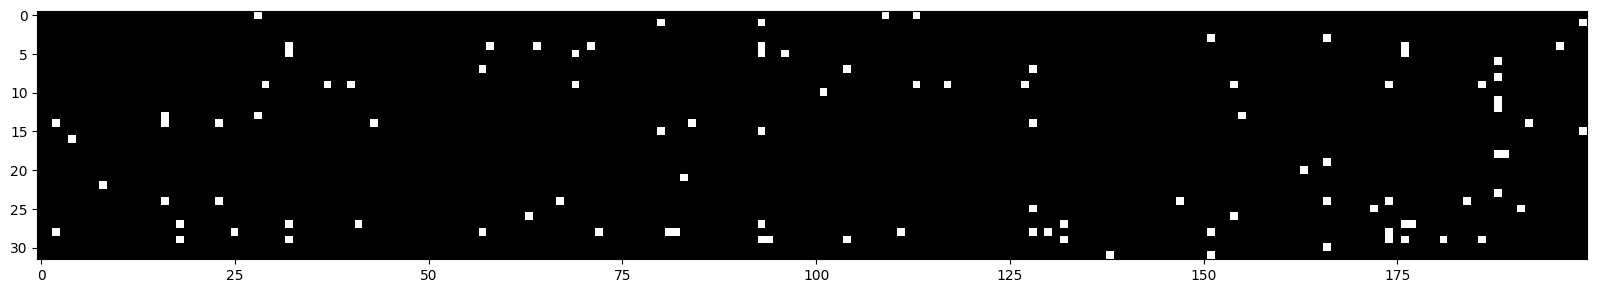

In [54]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

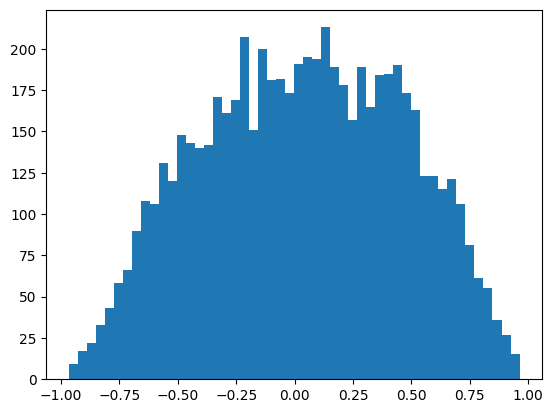

In [48]:
plt.hist(h.view(-1).tolist(), 50);

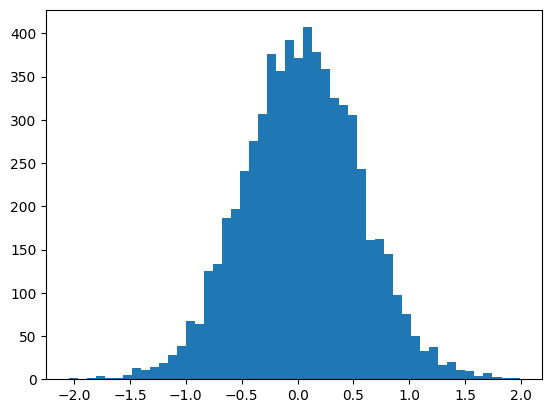

In [49]:
plt.hist(hpreact.view(-1).tolist(), 50);

In [40]:
logits[31]

tensor([-0.0727, -0.0636,  0.0549,  0.0284,  0.2138,  0.0907,  0.0254,  0.1912,
        -0.0251,  0.1042,  0.2637,  0.0818, -0.1316, -0.1630, -0.0147,  0.2938,
        -0.0488, -0.0956,  0.1463, -0.0641, -0.0354,  0.0510, -0.2465, -0.2711,
         0.1083,  0.0665, -0.0598], grad_fn=<SelectBackward0>)

In [30]:
-torch.tensor(1/27.0).log()

tensor(3.2958)

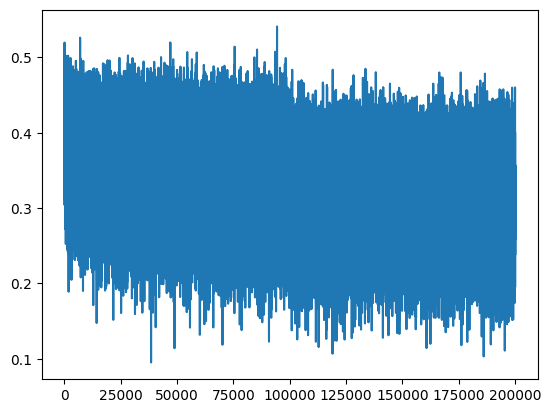

In [42]:
plt.plot(lossi)

In [ ]:
# loss log
# original:


# fix softmax 
train 2.067230701446533
val 2.136781930923462

# fix tanh layer too saturated at init:
train 2.0339813232421875
val 2.1082637310028076

In [57]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
    x,y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xte, Yte),
    }[split]
    emb = C[x] # (N, block_size, n_embd)
    embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
    h = torch.tanh(embcat @ W1 + b1) # (32, 100) hidden layer
    logits = h @ W2 + b2 # (32, 27) output layer
    loss = F.cross_entropy(logits, y) 
    print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0339813232421875
val 2.1082637310028076


In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      emb = C[torch.tensor([context])] # (1,block_size,n_embd)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)  
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
      x = emb.view(emb.shape[0], -1) # concatenate the vectors
      for layer in layers:
        x = layer(x)
      logits = x
      
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out)) # decode and print the generated word

In [97]:
x =logits.max(1)

In [109]:
torch.randint(0, X.shape[0], (32,))

tensor([158989,  62780,  46407, 211708,  59324, 199524,  71096, 170125,  79818,
         66386, 164519,  23341, 153737,  18118,   3396, 214381, 190329,  16422,
        216412,  87330, 214197,  39250,   6327, 156388, 225341, 180642, 183091,
         48008,  51357,  31222, 153567, 199523])

In [221]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2028, grad_fn=<NllLossBackward0>)

In [ ]:
# how do you find a reasonable learning rate?

# learning rate decay during later part of traning.

# split dataset : training , dev/validation, test
# 80%, 10%, 10%

In [234]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1532, grad_fn=<NllLossBackward0>)

In [233]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1181, grad_fn=<NllLossBackward0>)

In [201]:
# since training loss is same develoment loss, that means we can still improve the network using scaling the network.

# dimension of embedding can be bottleneck

# visualize the embedding vectors

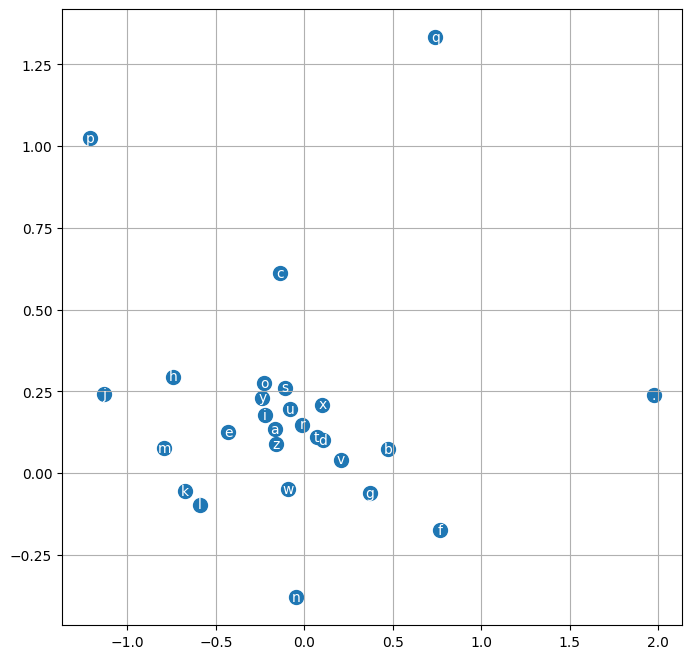

In [228]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=100)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')

plt.grid('minor')

In [ ]:
# sample from the model

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):